# Computer Games Sellings Analysis

In this project we need to predict the best selling computer games for the next year. To do that we going to analyze statistics of previous years (before 2017) - sales, critic and user scores, genres, platforms, etc.   

## Data Exploration

In [1]:
#libraries importing and data loading
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')

In [2]:
#a look at the data
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2060,God of War: Ghost of Sparta,PSP,2010.0,Action,0.41,0.35,0.03,0.21,86.0,8.4,M
15356,World Neverland 2in1 Portable: Olerud Kingdom ...,PSP,2008.0,Simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN
63,Mario Kart 64,N64,1996.0,Racing,5.55,1.94,2.23,0.15,NaN,NaN,NaN
14085,J-League Pro Striker 2,GEN,1994.0,Sports,0.00,0.00,0.04,0.00,NaN,NaN,NaN
8954,Tamagotchi Collection,DS,2011.0,Misc,0.00,0.00,0.15,0.00,NaN,NaN,NaN
9047,Mojo!,PS2,2003.0,Puzzle,0.07,0.05,0.00,0.02,NaN,NaN,NaN
11996,Child of Light,PSV,2014.0,Role-Playing,0.00,0.04,0.02,0.01,83.0,7.8,E10+
8329,Major League Baseball 2K9,PS2,2009.0,Sports,0.08,0.06,0.00,0.02,NaN,5.4,E
4813,Ragnarok Odyssey,PSV,2012.0,Role-Playing,0.20,0.01,0.16,0.03,66.0,7.8,T
15236,Kung Fu Panda,PC,2008.0,Action,0.00,0.02,0.00,0.00,71.0,7.8,E10+


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
#platforms
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [6]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [7]:
#platforms lifetime
platform_years = data.pivot_table(values='Year_of_Release', index='Platform', aggfunc=[min, max]).sort_values
platform_years

<bound method DataFrame.sort_values of                      min             max
         Year_of_Release Year_of_Release
Platform                                
2600              1980.0          1989.0
3DO               1994.0          1995.0
3DS               2011.0          2016.0
DC                1998.0          2008.0
DS                1985.0          2013.0
GB                1988.0          2001.0
GBA               2000.0          2007.0
GC                2001.0          2007.0
GEN               1990.0          1994.0
GG                1992.0          1992.0
N64               1996.0          2002.0
NES               1983.0          1994.0
NG                1993.0          1996.0
PC                1985.0          2016.0
PCFX              1996.0          1996.0
PS                1994.0          2003.0
PS2               2000.0          2011.0
PS3               2006.0          2016.0
PS4               2013.0          2016.0
PSP               2004.0          2015.0
PSV               

In [8]:
#check ratings
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### Conclusion

## Data Preprocessing

In [9]:
#check duplicates
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
#convert to lower case
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [11]:
#fix rating names
data[data['rating'] == 'K-A'] = data[data['rating'] == 'E']

In [12]:
#drop missing values
data = data.dropna(subset = ['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 16714
Data columns (total 11 columns):
name               16710 non-null object
platform           16710 non-null object
year_of_release    16441 non-null float64
genre              16710 non-null object
na_sales           16710 non-null float64
eu_sales           16710 non-null float64
jp_sales           16710 non-null float64
other_sales        16710 non-null float64
critic_score       8136 non-null float64
user_score         10011 non-null object
rating             9946 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [13]:
#try to fill missing values with dates from their names. For example FIFA 2009 probably issued eather in 2008 or 2009
data['year_in_name'] = data['name'].str.extract('(\d+)') #extract numerics from game names
data['year_in_name'] = data['year_in_name'].fillna(0).astype(int) #fill missing values with 0

data['year_of_release'] = data['year_of_release'].fillna(data['year_in_name']) #fill missing values with extarcted data
data = data.drop(data.query('year_of_release < 1980 or year_of_release > 2016').index) # drop inadequate dates
data = data.drop('year_in_name', axis=1) #don't need it anymore
data['year_of_release'] = data['year_of_release'].astype(int)  

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 11 columns):
name               16458 non-null object
platform           16458 non-null object
year_of_release    16458 non-null int64
genre              16458 non-null object
na_sales           16458 non-null float64
eu_sales           16458 non-null float64
jp_sales           16458 non-null float64
other_sales        16458 non-null float64
critic_score       7994 non-null float64
user_score         9848 non-null object
rating             9776 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [14]:
#convert to float
data['user_score'] = data['user_score'].replace('tbd', np.NaN) 
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 11 columns):
name               16458 non-null object
platform           16458 non-null object
year_of_release    16458 non-null int64
genre              16458 non-null object
na_sales           16458 non-null float64
eu_sales           16458 non-null float64
jp_sales           16458 non-null float64
other_sales        16458 non-null float64
critic_score       7994 non-null float64
user_score         7470 non-null float64
rating             9776 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
#fill missing values in critic_score
#at first with median of values grouped by paltform and genre 
data['critic_score'] = data['critic_score'].fillna(data.groupby(by=['platform', 'genre'])['critic_score'].transform('median'))
data['user_score'] = data['user_score'].fillna(data.groupby(by=['platform', 'genre'])['user_score'].transform('median'))
#then with genre
data['critic_score'] = data['critic_score'].fillna(data.groupby(by='genre')['critic_score'].transform('median'))
data['user_score'] = data['user_score'].fillna(data.groupby(by='genre')['user_score'].transform('median'))

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 11 columns):
name               16458 non-null object
platform           16458 non-null object
year_of_release    16458 non-null int64
genre              16458 non-null object
na_sales           16458 non-null float64
eu_sales           16458 non-null float64
jp_sales           16458 non-null float64
other_sales        16458 non-null float64
critic_score       16458 non-null float64
user_score         16458 non-null float64
rating             9776 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [16]:
#fill missing values 
data['rating'] = data['rating'].fillna('unknown')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 11 columns):
name               16458 non-null object
platform           16458 non-null object
year_of_release    16458 non-null int64
genre              16458 non-null object
na_sales           16458 non-null float64
eu_sales           16458 non-null float64
jp_sales           16458 non-null float64
other_sales        16458 non-null float64
critic_score       16458 non-null float64
user_score         16458 non-null float64
rating             16458 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
#convert to category to save some RAM
cols = ['rating', 'genre', 'platform']

for i in cols:
    data[i] = data[i].astype('category')

In [18]:
#convert to integer
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 11 columns):
name               16458 non-null object
platform           16458 non-null category
year_of_release    16458 non-null int64
genre              16458 non-null category
na_sales           16458 non-null float64
eu_sales           16458 non-null float64
jp_sales           16458 non-null float64
other_sales        16458 non-null float64
critic_score       16458 non-null float64
user_score         16458 non-null float64
rating             16458 non-null category
dtypes: category(3), float64(6), int64(1), object(1)
memory usage: 1.2+ MB


In [19]:
#add summary sales column
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [20]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,16458.000000,16458.000000,16458.000000,16458.000000,16458.000000,16458.000000,16458.000000,16458.000000
mean,2006.487423,0.264160,0.146103,0.078353,0.047683,68.926662,7.342493,0.536298
std,5.872353,0.818558,0.506857,0.310792,0.188058,10.458248,1.102111,1.558776
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,64.000000,7.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,70.000000,7.550000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,74.000000,7.950000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


### Conclusion

Data preprocessing has done. We ready for analysis.

## Data Analysis

Text(0, 0.5, 'number of games')

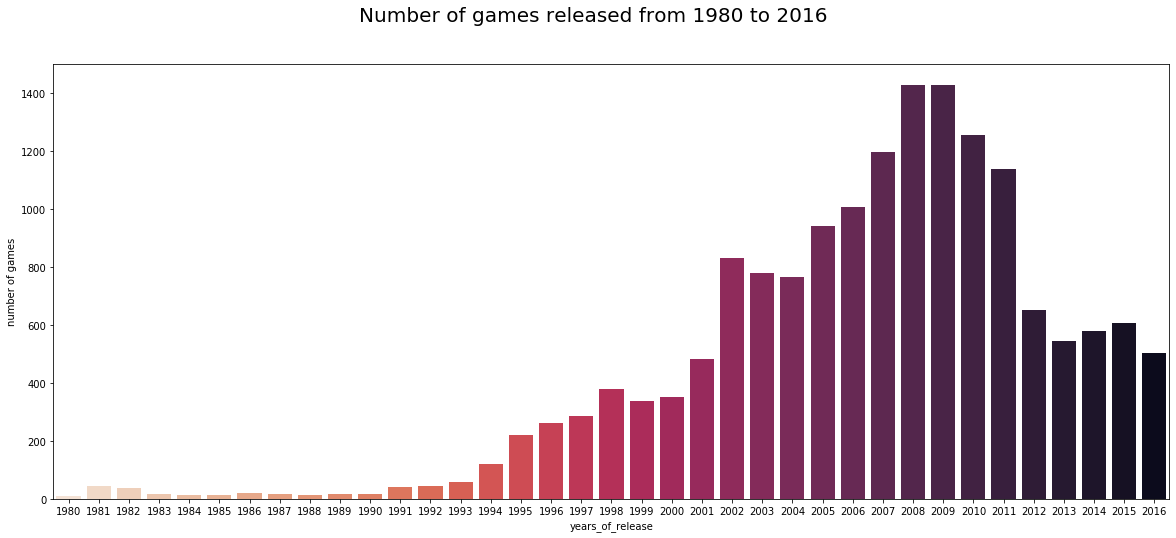

In [21]:
#see how many games were issued in each year
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(20,8))
sns.barplot(x=games_per_year.index, y=games_per_year['name'], palette="rocket_r")
plt.suptitle('Number of games released from 1980 to 2016', fontsize=20)
plt.xlabel('years_of_release')
plt.ylabel('number of games')

Game industry passed from appearence and growing to falling and stagnation. The most important years for further analysis are last two - 2015 and 2016

In [22]:
# calculate sales for each platform
modern_era_data = data.query('year_of_release > 2014')
platform_sales = modern_era_data.pivot_table(index='platform', values='sum_sales', aggfunc=('sum')).sort_values(by='sum_sales', ascending=False)
platform_sales

,sum_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


In [23]:
#top 10 platforms
big_ten_list = platform_sales.head(10).index
big_ten_platforms = modern_era_data.query('platform in @big_ten_list')

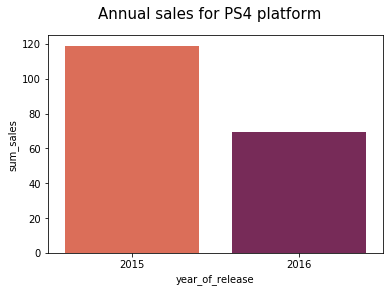

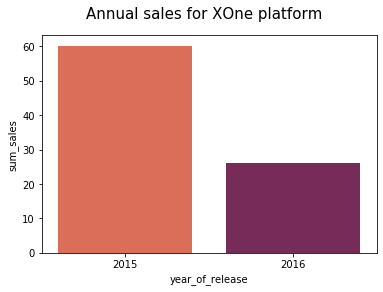

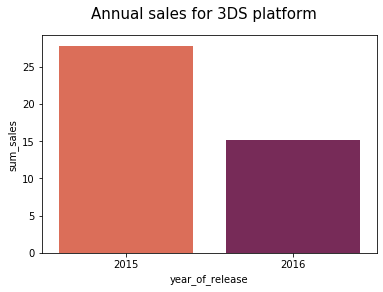

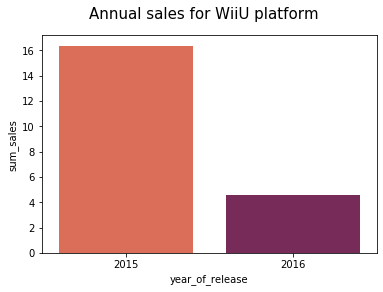

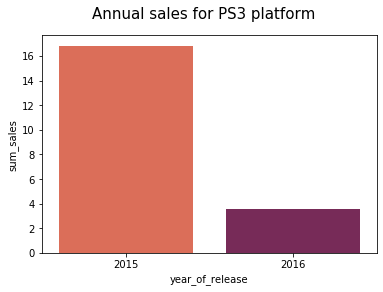

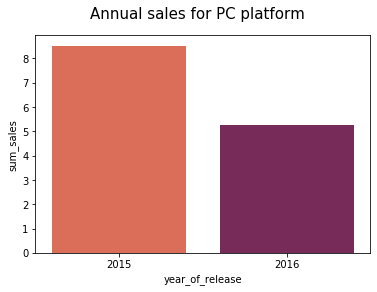

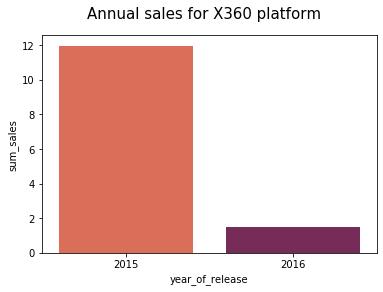

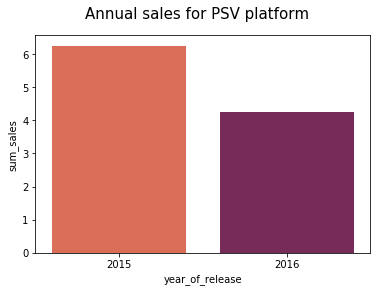

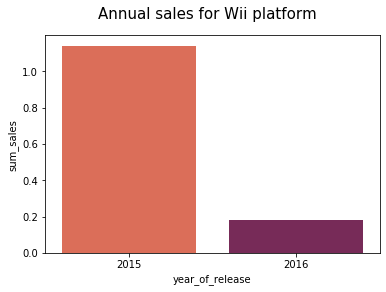

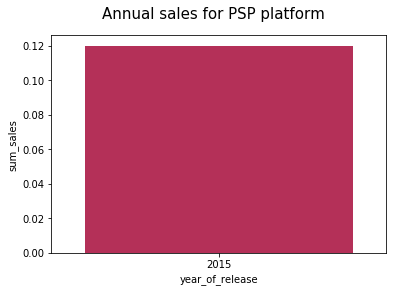

In [24]:
#top 10 platforms sales in last two years
for platforms in big_ten_list:
    big_ten_pivot = modern_era_data.query('platform == @platforms').pivot_table(index='year_of_release', values='sum_sales', aggfunc=('sum'))
    sns.barplot(x=big_ten_pivot.index, y=big_ten_pivot['sum_sales'], palette="rocket_r")
    plt.suptitle('Annual sales for {} platform'.format(platforms), fontsize=15)
    plt.show()

A platform lifetime as usual about 10 years. The most successful platform of modern days are PS4, XOne, 3DS, WiiU, PS3, РС, PSV, X360, Wii. But sellings of all of them are decreasing now. Pick up for futher exploration four of them - PS4, XOne, 3DS, WiiU

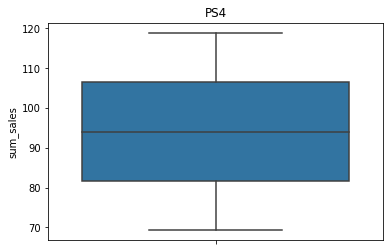

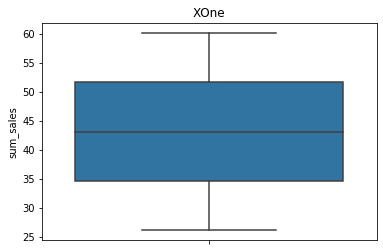

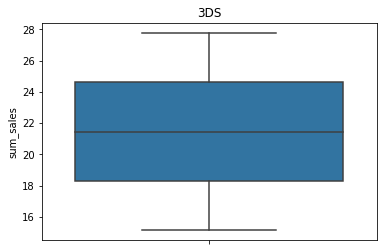

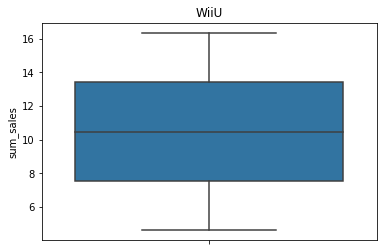

In [25]:
#boxplots
modern_leaders_list = ['PS4', 'XOne', '3DS', 'WiiU']
for platforms in modern_leaders_list:
    big_four_pivot = modern_era_data.query('platform == @platforms').pivot_table(index='year_of_release', values='sum_sales', aggfunc=('sum'))
    sns.boxplot(y=big_four_pivot['sum_sales']).set_title(platforms)
    plt.show()

All distributions look good, no any skews. From boxplots we can see sales segments for each paltform (PS4 on the top, WiiU at the basement)

(<seaborn.axisgrid.PairGrid at 0x7fa49904a9d0>,
 Text(0.5, 1.05, 'Scatter matrix for PS4 platform'),
               sum_sales  critic_score  user_score
 sum_sales      1.000000      0.298403   -0.080034
 critic_score   0.298403      1.000000    0.489560
 user_score    -0.080034      0.489560    1.000000)

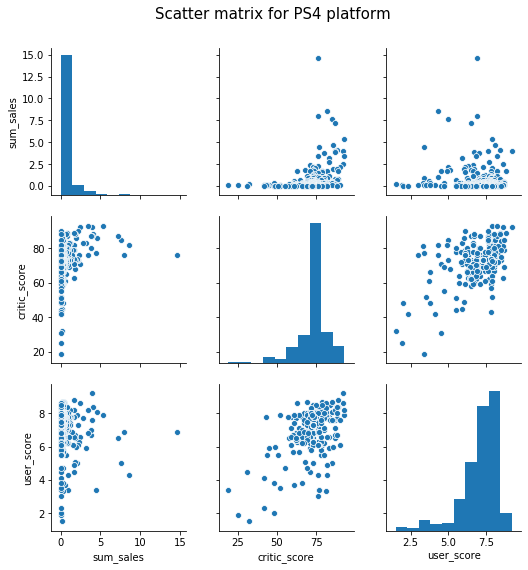

In [26]:
#explore influence of users and critic scores on sales for PS4
def data_pairplot(dataset, platform_name):
    plot = sns.pairplot(dataset[['sum_sales', 'critic_score', 'user_score']][dataset['platform'] == platform_name])
    return (plot, plot.fig.suptitle('Scatter matrix for {} platform'.format(platform_name), fontsize=15, y=1.05), 
            dataset[['sum_sales', 'critic_score', 'user_score']][dataset['platform'] == platform_name].corr())
    
data_pairplot(modern_era_data, 'PS4')

Week correlation between crirtic scores and sales. Meanwhile, sales don't depend on user scores. 

(<seaborn.axisgrid.PairGrid at 0x7fa4996fe510>,
 Text(0.5, 1.05, 'Scatter matrix for XOne platform'),
               sum_sales  critic_score  user_score
 sum_sales      1.000000      0.330301   -0.031597
 critic_score   0.330301      1.000000    0.400464
 user_score    -0.031597      0.400464    1.000000)

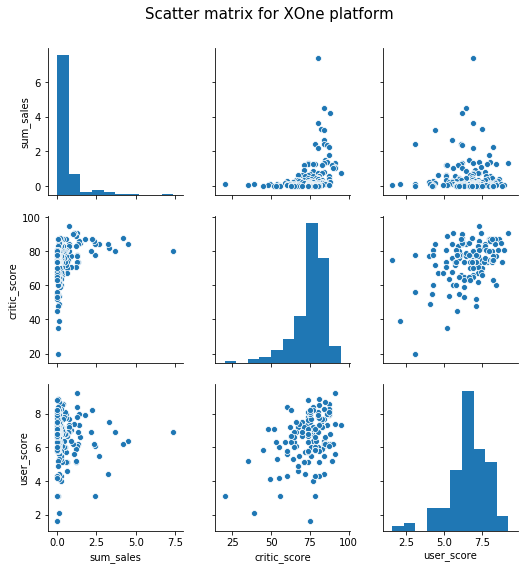

In [27]:
#XOne
data_pairplot(modern_era_data, 'XOne')

For XOne correlation between critic score and sales is stronger. And also no dependence on users opinion.

(<seaborn.axisgrid.PairGrid at 0x7fa498d89910>,
 Text(0.5, 1.05, 'Scatter matrix for 3DS platform'),
               sum_sales  critic_score  user_score
 sum_sales      1.000000      0.151687    0.171113
 critic_score   0.151687      1.000000    0.758573
 user_score     0.171113      0.758573    1.000000)

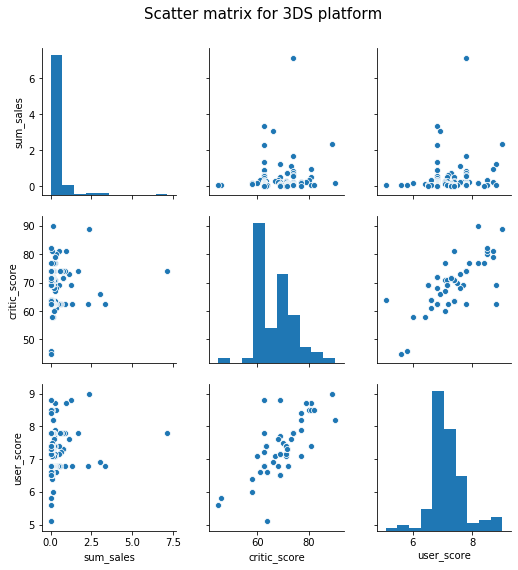

In [28]:
#3DS
data_pairplot(modern_era_data, '3DS')

In case of 3DS both dependences are almost the same week

(<seaborn.axisgrid.PairGrid at 0x7fa498be2e90>,
 Text(0.5, 1.05, 'Scatter matrix for WiiU platform'),
               sum_sales  critic_score  user_score
 sum_sales      1.000000      0.290748    0.327516
 critic_score   0.290748      1.000000    0.574496
 user_score     0.327516      0.574496    1.000000)

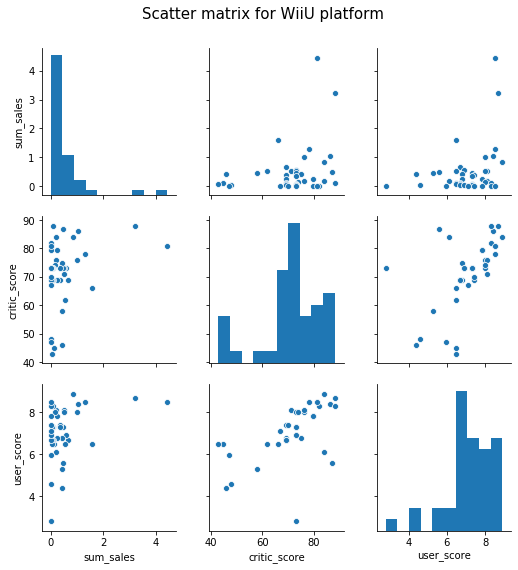

In [29]:
#WiiU
data_pairplot(modern_era_data, 'WiiU')

For WiiU sales depends on critic scores almost the same way as for PS4, but user opinions are important too. Besides, there are many games with high scores but low sales. After putting this area aside correlations became more strong. Summurizing all the above in case of two leading platforms sales depend on critic scores stronger than on user scores. For the last two - correlations with user opininons and with critic scores are alike. But it's not always right to say that high critics and users scores leads to good sellings. 

Text(0.5, 1.0, 'Shares of games by genre')

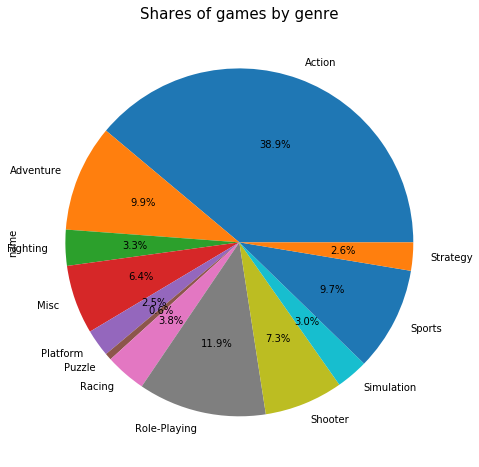

In [30]:
#genre distribution
modern_era_data.groupby('genre')['name'].count().plot.pie(autopct="%.1f%%", figsize=(8, 8))
plt.title('Shares of games by genre', fontsize=15)

In [31]:
#calculate sales and number of games for eah genre
genres_stat = modern_era_data.pivot_table(
    index = 'genre',
    values = ['name', 'sum_sales'],
    aggfunc = {'name': 'count', 'sum_sales':sum}).reset_index()

genres_stat.columns = ['genre', 'total_games', 'total_sales']

In [32]:
#calculate a profit column  
genres_stat["profit"] = genres_stat["total_sales"] / genres_stat["total_games"]
genres_stat = genres_stat.sort_values(by = 'profit', ascending = False)

Text(0.5, 1.0, 'Average revenue for genres')

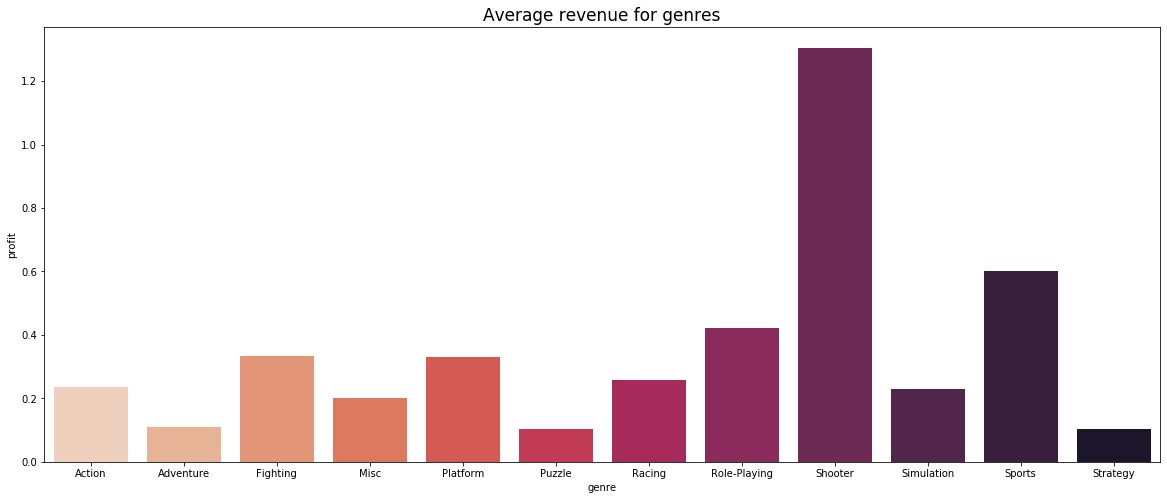

In [33]:
#evaluate profits for each genre
plt.figure(figsize=(20,8))
sns.barplot(x=genres_stat["genre"], y=genres_stat["profit"], palette="rocket_r")
plt.title('Average revenue for genres', fontsize=17)

As expected the most popular genre is shooter, RPG, sports, fighting and platform are also selling good. Despite of that the most frequencies genres - Action, Role-Playing и Adventure. 

## User Portreits

In [34]:
#top 5 most popular platformms for each region
def user_portrait(dataset, index):
    cols = ['na_sales', 'eu_sales', 'jp_sales']
    for _ in cols:
        print(dataset.pivot_table(index=index, values=_).sort_values(_, ascending=False).head())
        print()
    
user_portrait(modern_era_data, 'platform')

          na_sales
platform          
XOne      0.301198
PS4       0.212159
WiiU      0.210952
X360      0.167708
Wii       0.098000

          eu_sales
platform          
PS4       0.277542
XOne      0.168263
WiiU      0.154524
Wii       0.146000
X360      0.087708

          jp_sales
platform          
3DS       0.178409
WiiU      0.098095
PS3       0.044775
PSV       0.043128
PS4       0.040033



American and European user choice XOne and PS4. Japanese - portable platforms.

In [35]:
#the most popular genres
user_portrait(modern_era_data, 'genre')

              na_sales
genre                 
Shooter       0.594815
Sports        0.245888
Role-Playing  0.150152
Fighting      0.149730
Platform      0.135000

              eu_sales
genre                 
Shooter       0.497284
Sports        0.260000
Racing        0.155238
Role-Playing  0.130379
Platform      0.114286

              jp_sales
genre                 
Role-Playing  0.101591
Puzzle        0.074286
Simulation    0.058485
Action        0.053480
Platform      0.050714



American an European users interests are alike again. Shooter and sports are in top 5. Meanwhile Americans more like fightings, but Europeanes - racings. In Japan shooters are not so popular. Users there likes RPG, puzzles and simulations.


In [36]:
#ESRB influence
user_portrait(modern_era_data, 'rating')

         na_sales
rating           
M        0.315638
E10+     0.176931
E        0.173791
T        0.119063
unknown  0.072982

         eu_sales
rating           
M        0.305638
E        0.227647
E10+     0.114257
T        0.105833
unknown  0.069610

         jp_sales
rating           
unknown  0.064113
T        0.040104
E        0.034314
E10+     0.032376
M        0.028792



In USA and Europe ESRB is important. In Japan it's no matter.

### Conclusion

Portreits of American and European gamers are alike. They like shooters, RPG, sports, platform on PS4 and XOne. Japanese preferes simulations, RPG, puzzles. The most popular platform - 3DS.

## Statistical Hypothesis Testing

### Test hypothesis: average user scores of Xbox One and PC are the same 


Let's vocabulate null hypothesis as "average user scores of Xbox One and PC are the same".
Then alternative hypotesis would be "average user scores of Xbox One and PC are different".
Amount of mean values from sample is large enough. Therefore on grounds of Central Limit Theorem the distribution of a sample variable approximates a normal distribution. So we can run T-test.


In [37]:
#check a stndard deviation
XOne_rating = modern_era_data.query('platform == "XOne"')['user_score']
XOne_rating.std()

1.2644440707942755

In [38]:
PC_rating = modern_era_data.query('platform == "PC"')['user_score']
PC_rating.std()

1.6620503345006559

In [39]:
#run T-test
def ttest(alpha, dataset1, dataset2):
    alpha = alpha
    results = st.ttest_ind(dataset1, dataset2, equal_var=False)
    print('p-value:', results.pvalue)
    if results.pvalue < alpha:
        print('Reject null hypothesis')
    else:
        print('Fail to reject null hypothesis') 
        
ttest(0.5, XOne_rating, PC_rating)

p-value: 0.6448263031236766
Fail to reject null hypothesis


### Conclusion

Assumption that average user scores of Xbox One and PC are the same is not disapproved by observations

### Test hypothesis: average user scores of Action and Sports genres are different

Let's vocabulate null hypothesis as "average user scores of Action and Sports genres are the same". Then alternative hypotesis would be "average user scores of Action and Sports genres are different". Amount of mean values from sample is large enough. Therefore on grounds of Central Limit Theorem the distribution of a sample variable approximates a normal distribution. So we can run a T-test.

In [40]:
#calculate stndard deviation
action_rating = modern_era_data.query('genre == "Action"')['user_score']
action_rating.std()

0.9441094814683492

In [41]:
sports_rating = modern_era_data.query('genre == "Sports"')['user_score']
sports_rating.std()

1.8290604144334128

In [42]:
ttest(0.5, action_rating, sports_rating)

p-value: 1.716082359090088e-13
Reject null hypothesis


### Conclusion

Assumption that average user scores of Action and Sports genres are the same is disapproved by observations

## General Conclusion

Computer game sellings are declining. So to be profitable we should look toward PS4, XOne, 3DS, WiiU platforms and pick Shooter, Sports, Role-Playing, Fighting genres. The most of the biggest markets are in USA and in Europe. The most popular platforms in this regions are XOne, PS4, WiiU, X360 and Shooter, Sports, Role-Playing, Fighting, Platform, Racing genres. To make the right choice we should pay attention to critic scores. Japanese market is not so large. Probably it's not a priority direction.

 